1. States with Most Number of Jobs.
2. Average Minimal and Maximal Salaries in Different States.
3. Average Salary in Different States.
4. Top 5 Industries with Maximum Number of Data Science Related Job Postings.
5. Companies with Maximum Number of Job Openings.
6. Job Titles with Most Number of Jobs.
7. Salary of Job Titles with Most Number of Jobs.

In [1]:
#importing warnings lib to ingnore all the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing required python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams

In [3]:
#Loading the dataset
df = pd.read_csv("data_cleaned_2021.csv")
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [4]:
#Dropping index column
df = df.drop("index",axis=1)

#Looking at the dimensions of the dataset
print(df.shape)

(742, 41)


In [5]:
#Missing values ?
df.isnull().sum()

Job Title             0
Salary Estimate       0
Job Description       0
Rating                0
Company Name          0
Location              0
Headquarters          0
Size                  0
Founded               0
Type of ownership     0
Industry              0
Sector                0
Revenue               0
Competitors           0
Hourly                0
Employer provided     0
Lower Salary          0
Upper Salary          0
Avg Salary(K)         0
company_txt           0
Job Location          0
Age                   0
Python                0
spark                 0
aws                   0
excel                 0
sql                   0
sas                   0
keras                 0
pytorch               0
scikit                0
tensor                0
hadoop                0
tableau               0
bi                    0
flink                 0
mongo                 0
google_an             0
job_title_sim         0
seniority_by_title    0
Degree                0
dtype: int64

In [6]:
#Checking Dtype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           742 non-null    object 
 1   Salary Estimate     742 non-null    object 
 2   Job Description     742 non-null    object 
 3   Rating              742 non-null    float64
 4   Company Name        742 non-null    object 
 5   Location            742 non-null    object 
 6   Headquarters        742 non-null    object 
 7   Size                742 non-null    object 
 8   Founded             742 non-null    int64  
 9   Type of ownership   742 non-null    object 
 10  Industry            742 non-null    object 
 11  Sector              742 non-null    object 
 12  Revenue             742 non-null    object 
 13  Competitors         742 non-null    object 
 14  Hourly              742 non-null    int64  
 15  Employer provided   742 non-null    int64  
 16  Lower Sa

In [7]:
 df.describe()

,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.754717,128.214286,101.484501,47.524259,0.528302,0.225067,...,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,0.801210,497.183763,0.177034,0.149721,30.945892,45.128650,37.482449,53.839080,0.499535,0.417908,...,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,12.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,25.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,60.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Average lower salary is about $75K.

50% of the jobs have the lower salary of around $69.5K, which is near to the mean $75K.

That means the mean value is not affectd much by the outliers (Min:$15K , Max:$202K)

Average Upper salary is about $128K.

50% of the jobs have the upper salary of around $124K, which is near to the mean $128K.

That means the mean value is not affectd much by the outliers (Min:$16K , Max:$306K)

Mean Avg. salary is about $101K.

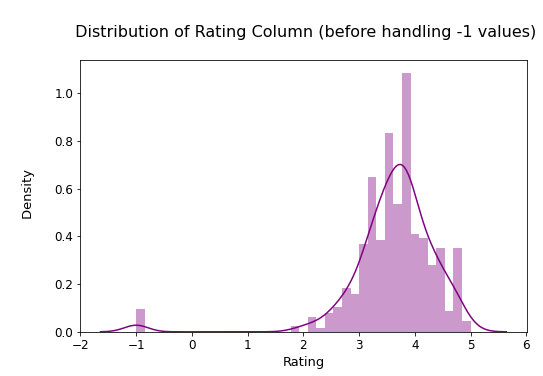

In [8]:
#Visualizing 'Rate' column (before replacing NaN)

plt.figure(figsize=(8,5))
plt.title('\n Distribution of Rating Column (before handling -1 values)\n', size=16, color='black')
plt.xlabel('\n Rating \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Plotting a distributive plot
sns.distplot(df.Rating,color="purple")
plt.show()

If we ignore the missing values the distribution forms a normal distribution (Gaussian distribution)

So we  can use mean value to replace the missing values as the data distribution is symmetric.

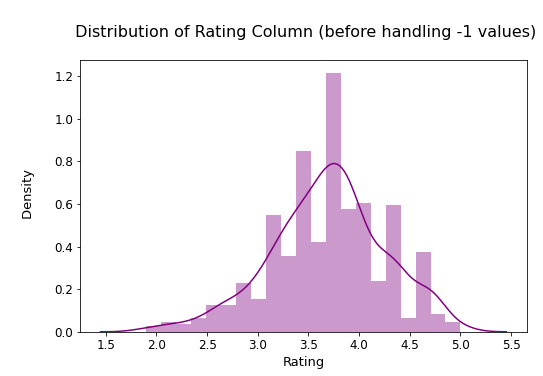

In [9]:
# Replacing -1 values with NaN.
df["Rating"] = df["Rating"].apply(lambda x: np.nan if x==-1 else x)
df["Rating"] = df["Rating"].fillna(df["Rating"].mean())

plt.figure(figsize=(8,5))
plt.title('\n Distribution of Rating Column (before handling -1 values)\n', size=16, color='black')
plt.xlabel('\n Rating \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Plotting a distributive plot
sns.distplot(df.Rating,color="purple")
plt.show()

 Most of the companies are rated between 3.5 - 4 stars.

<Figure size 576x360 with 0 Axes>

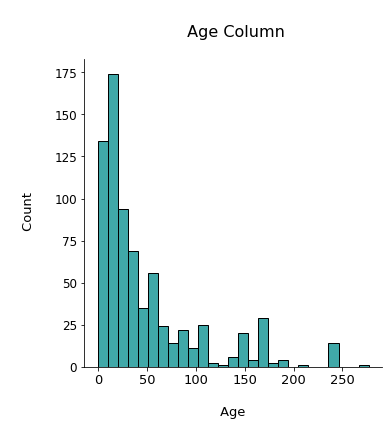

In [10]:
#Visualizing 'Age' column (before replacing NaN)

plt.figure(figsize=(8,5))

#Plotting a distributive plot
sns.displot(df.Age,color="darkcyan")

plt.title('\n Age Column\n', size=16, color='black')
plt.xlabel('\n Age \n', fontsize=13, color='black')
plt.ylabel('\n Count\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)

plt.show()

There are few outliers, we will use box plotting to find them

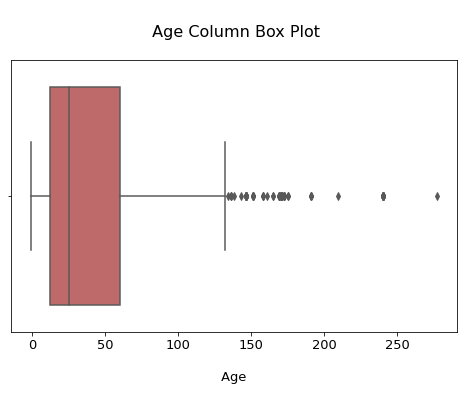

In [11]:
plt.figure(figsize=(8,5))

#Plotting a Box plot
sns.boxplot(df.Age,color="indianred")

plt.title('\n Age Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Age \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

There are many outliers in the Age column

We can't trust the mean of age as it will be clearly biased towards the outliers.

# 1. States with Most Number of Jobs.

In [12]:
# Let's look at the different job locations in our dataset
df["Job Location"].nunique()

37

In [13]:
#Lets look at the top 10 states with the most number of job postings.
x=df["Job Location"].value_counts().index[0:10]
x

Index(['CA', 'MA', 'NY', 'VA', 'IL', 'MD', 'PA', 'TX', 'NC', 'WA'], dtype='object')

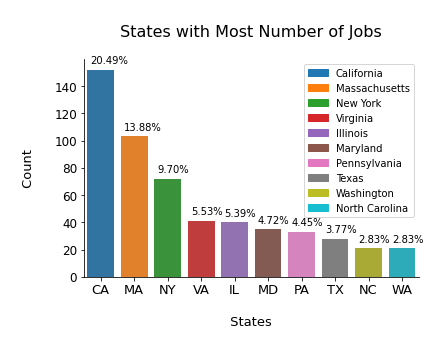

In [14]:
#Adding labels for the top 10 states
lab=["California","Massachusetts","New York","Virginia","Illinois","Maryland","Pennsylvania","Texas","Washington","North Carolina"]

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x=df["Job Location"].value_counts().index[0:10], y = df["Job Location"].value_counts()[0:10])

#Removing top and left borders
sns.despine(bottom = False, left = False)

rcParams['figure.figsize'] = 12,5

#assigning % values
spots = df["Job Location"].value_counts().index[0:10]
for p in ax.patches:
    ax.text(p.get_x() + 0.1, p.get_height()+4.5, '{:.2f}%'.format((p.get_height()/742)*100))

#assigning attrtibutes to the plot
plt.title('\n States with Most Number of Jobs \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=j) for i,j in zip(range(0,10),lab)]
plt.legend(handles=patches, loc="upper right")
plt.show()

California has the most number of job as it is a hub for Tech. companies and has silicon valley.

According to latest edition of the Milken Institute’s State and Technology Index, Massachusetts has now become the tech state of US, so it is on 2nd rank.

Despite having the largest number of Fortune 500 companies HQ in New York, it is still on 3rd position.

Calfornia, Massachusetts, New York, Virginia together has around 50% jobs

# 2. Average Minimal and Maximal Salaries in Different States.

In [15]:
# Creating a dataframe containing: Job Location, Lower Salary and Upper Salary
a=df.groupby("Job Location")["Lower Salary","Upper Salary"].mean().reset_index()
#Making a sorter, to sort the dataframe according to the states which contains maximum number of jobs.
sorter = df["Job Location"].value_counts().index
sorter

Index(['CA', 'MA', 'NY', 'VA', 'IL', 'MD', 'PA', 'TX', 'NC', 'WA', 'NJ', 'FL',
       'OH', 'TN', 'DC', 'CO', 'WI', 'UT', 'IN', 'AZ', 'MO', 'AL', 'GA', 'DE',
       'KY', 'MI', 'CT', 'IA', 'LA', 'OR', 'NE', 'NM', 'KS', 'ID', 'MN', 'RI',
       'SC'],
      dtype='object')

In [16]:
# Converting Job Location column as Category and setting the sorter.
a["Job Location"] = a["Job Location"].astype("category")
a["Job Location"].cat.set_categories(sorter, inplace=True)

#Resetting and droping the index
a = a.sort_values(["Job Location"]).reset_index()
a = a.drop("index",axis=1)

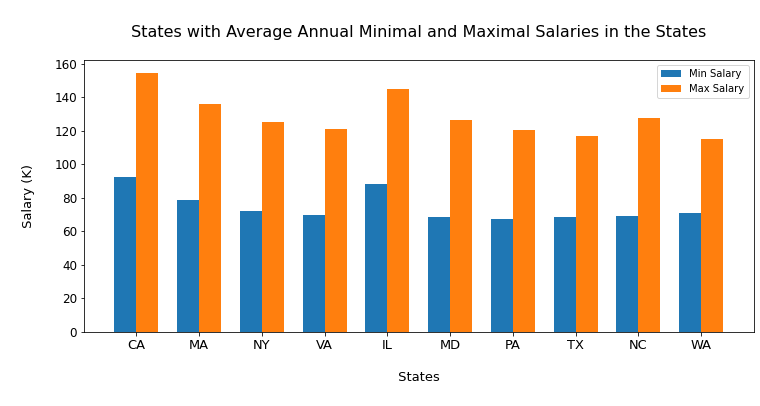

In [17]:
# Plotting min, max salaries.

lab=[]
for i in sorter[0:10]:
  lab.append(i)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x - width/2, a["Lower Salary"][0:10], width, label='Min Salary')
rects2 = ax.bar(x + width/2, a["Upper Salary"][0:10], width, label='Max Salary')

#assigning attrtibutes to the plot
plt.title('\n States with Average Annual Minimal and Maximal Salaries in the States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')

ax.set_xticks(x)
ax.set_xticklabels(lab)
ax.legend()
plt.show()

California has the highest average maximal annual salary, followed by Illinois.

Pennsylvania has the lowest average minimum annual salary among the top 10 states.

Washington has the lowest average maximum annual salary among the top 10 states.

#  3. Average Salary in Different States.

In [18]:
#Making a DF of Average Salary of top 10 states in which job postings was maximum.

g = df.groupby("Job Location")["Avg Salary(K)"].mean().sort_values(ascending=False)[0:10]
g = g.reset_index().rename(columns={"Job Location":"Job Location","Avg Salary(K)":"Average Salary"})

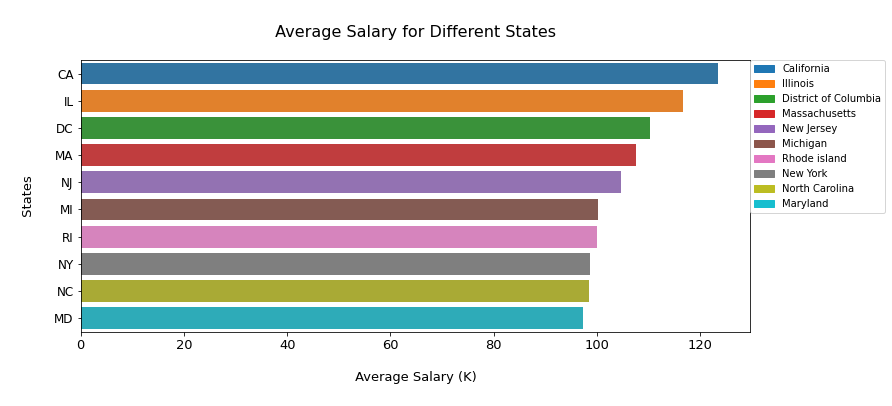

In [19]:
# Plotting the average salary per annum for different states.
lab=["California","Illinois","District of Columbia","Massachusetts","New Jersey","Michigan","Rhode island","New York","North Carolina","Maryland"]

sns.barplot(y="Job Location", x = "Average Salary",data=g)

#Beautifying the plot

plt.title('\n Average Salary for Different States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Average Salary (K) \n', fontsize=13, color='black')
plt.ylabel('\n States \n', fontsize=13, color='black')
patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=j) for i,j in zip(range(0,10),lab)]
plt.legend(handles=patches,bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

California has the highest average annual salary, followed by Illinois.

Maryland has the lowest average annual salary because it is hiring less number of people.

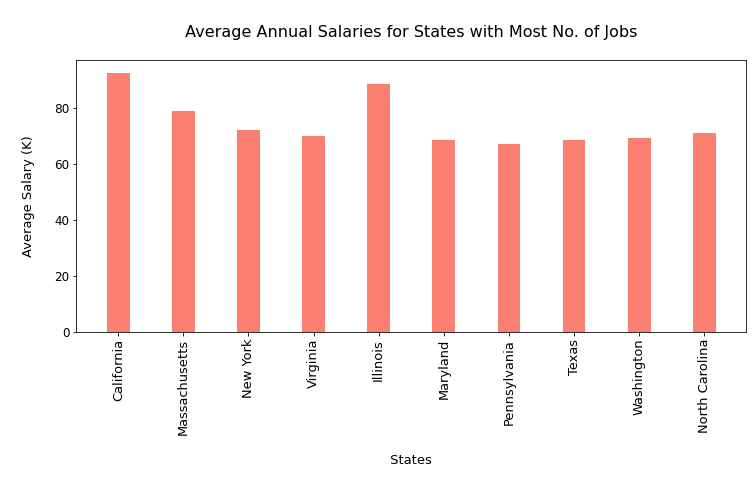

In [20]:
#Drawing bar plot of average salaries reported by top 10 states with most no. of jobs.
labe=["California","Massachusetts","New York","Virginia","Illinois","Maryland","Pennsylvania","Texas","Washington","North Carolina"]

lab=[]
for i in sorter[0:10]:
  lab.append(i)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x, a["Lower Salary"][0:10], width, label='Min Salary',color="salmon")

#Beautifying the plot

plt.title('\n Average Annual Salaries for States with Most No. of Jobs \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.xticks(rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n Average Salary (K) \n', fontsize=13, color='black')
ax.set_xticks(x)
ax.set_xticklabels(labe)
plt.show()

California has the highest average annual salary among all 10 states, followed by Illinois.

Only 3 out of 10 states, California, Massachusetts and Illinois, have average annual salary more than $100K.

Even though District of Columbia, New Jersey, Michigan and Rhode Island are not in top 10 states with highest number of jobs, those states still offers an average annual salary of greater than 100,000$.

# 4. Top 5 Industries with Maximum Number of Data Science Related Job Postings.

In [21]:
#Number of industries
df["Industry"].nunique()

60

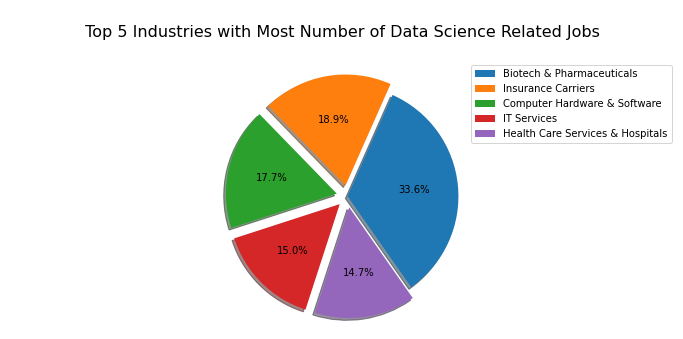

In [22]:
#Plotting pie chart
my_explode=(0,0.1,0.1,0.1,0.1)
#choosing the top 5 industries for insights
labels= [x for x in df["Industry"].value_counts().sort_values(ascending=False)[0:5].index] # piechart for only top 5 industry
patches,ax, text= plt.pie(df["Industry"].value_counts().sort_values(ascending=False)[0:5],autopct='%1.1f%%',explode=my_explode,shadow=True,startangle=305)
plt.title('\n Top 5 Industries with Most Number of Data Science Related Jobs \n', size=16, color='black')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.show()

Biotech & Pharmaceuticals Industry has maximum number of jobs followed by Insurance carriers.

IT industry has fewer jobs for data science related roles.

For this dataset, Biotech & Pharmaceuticals Industry has twice the amount of jobs compared to IT services industry.

Heath Care Services & Hospitals industry is hiring at a good rate because they almost surpassed the IT services industry.

In [23]:
# Making a sorter, to sort the index with Industries having highest number of data science related jobs
sort_ind = df["Industry"].value_counts().sort_values(ascending=False).index

In [24]:
#Making a DF and sortring it w.r.t. sort_ind

ind = df.groupby("Industry")["Lower Salary","Upper Salary"].mean().sort_values("Industry",ascending=False)
ind = ind.reset_index()

# Converting Industry column as Category and setting the sorter.

ind["Industry"] = ind["Industry"].astype("category")
ind["Industry"].cat.set_categories(sort_ind, inplace=True)

#Resetting and droping the index

ind = ind.sort_values(["Industry"]).reset_index()
ind = ind.drop("index",axis=1)

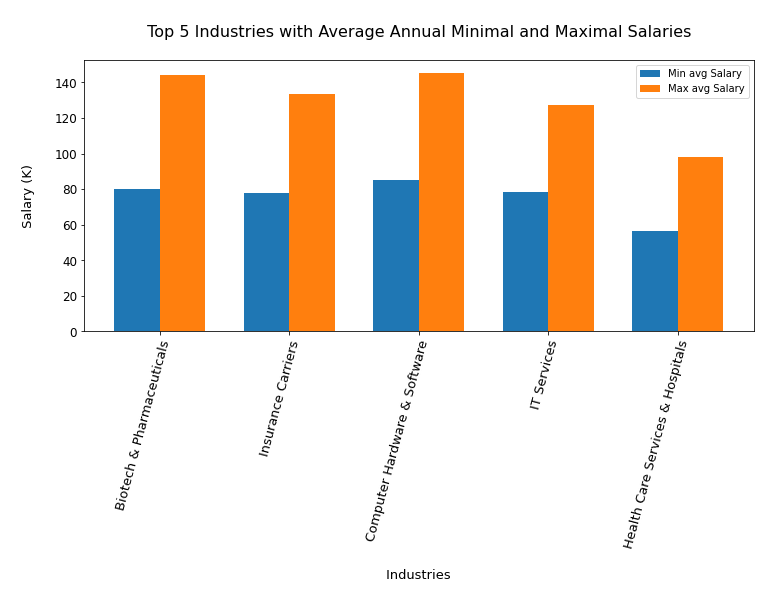

In [25]:
# Drawing the grouped bar plot.

lab=[]
for i in sort_ind[0:5]:
  lab.append(i)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x - width/2, ind["Lower Salary"][0:5], width, label='Min avg Salary')
rects2 = ax.bar(x + width/2, ind["Upper Salary"][0:5], width, label='Max avg Salary')

#Beautifying the plot
plt.title('\n Top 5 Industries with Average Annual Minimal and Maximal Salaries \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.xticks(rotation=75,ha='right', rotation_mode='anchor')
plt.yticks(fontsize=12)
plt.xlabel('\n Industries \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')
ax.set_xticks(x)
ax.set_xticklabels(lab)
ax.legend(loc="upper right")
plt.show()

Computer Hardware & Software Industry has the highest average maximal and maximal salary among the 5 selected industries, it is followed by Biotech & Pharmaceuticals.

Health Care Services & Hospitals industry has the lowest average maximal and minimal salary among the 5 selected industries.

# 5. Companies with Maximum Number of Job Openings and their salaries

In [26]:
# Total number of companies
df.company_txt.nunique()

343

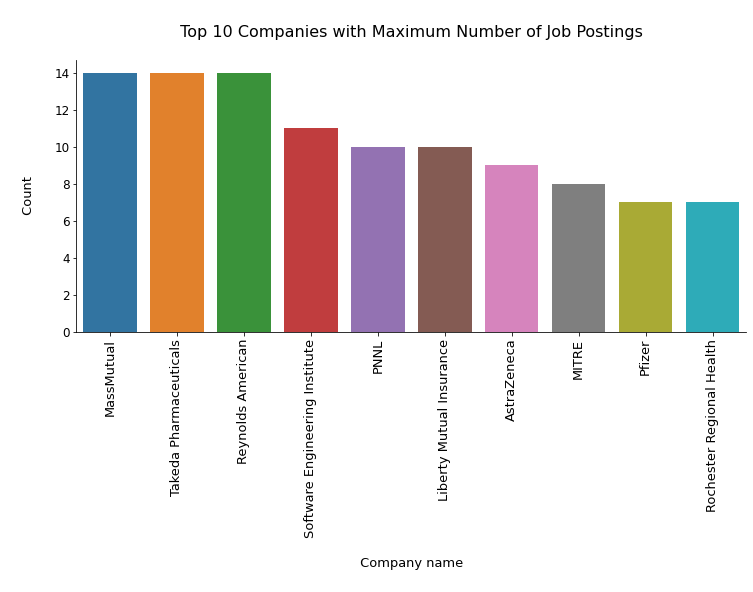

In [27]:
# Viualizing the top 10 companies
fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= df["company_txt"].value_counts().sort_values(ascending=False).head(10).index ,y= df["company_txt"].value_counts().sort_values(ascending=False).head(10))

#Removing top and Right borders
sns.despine(bottom = False, left = False)

# figure size in inches
import matplotlib
from matplotlib import rcParams
#rcParams['figure.figsize'] = 12,5

#assigning attributes to the plot
plt.title('\n Top 10 Companies with Maximum Number of Job Postings \n', size=16, color='black')
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('\n Company name \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

In [28]:
# Sorting w.r.t. companies having highest number of data science related jobs
sort_com = df["company_txt"].value_counts().sort_values(ascending=False).index

In [29]:
#Making a DF and sortring it w.r.t. sort_com

com = df.groupby("company_txt")["Lower Salary","Upper Salary"].mean().sort_values("company_txt",ascending=False)
com = com.reset_index()

# Converting company_txt column as Category and setting the sorter.

com["company_txt"] = com["company_txt"].astype("category")
com["company_txt"].cat.set_categories(sort_com, inplace=True)

#Resetting and droping the index

com = com.sort_values(["company_txt"]).reset_index()
com = com.drop("index",axis=1)

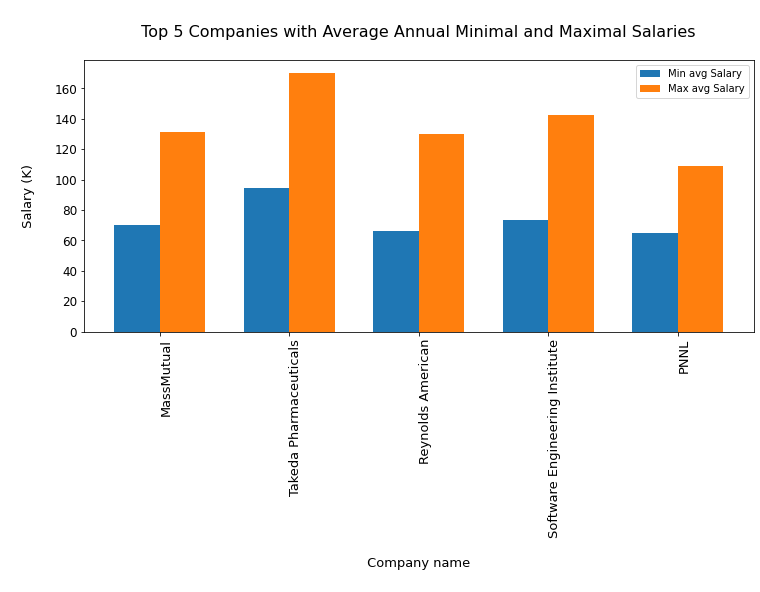

In [30]:
# Drawing the grouped bar plot.
lab=[]
for i in sort_com[0:5]:
  lab.append(i)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x - width/2, com["Lower Salary"][0:5], width, label='Min avg Salary')
rects2 = ax.bar(x + width/2, com["Upper Salary"][0:5], width, label='Max avg Salary')

#Beautifying the plot
plt.title('\n Top 5 Companies with Average Annual Minimal and Maximal Salaries \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.yticks(fontsize=12)
plt.xlabel('\n Company name \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')
ax.set_xticks(x)
ax.set_xticklabels(lab)
ax.legend(loc="upper right")
plt.show()

Again, we see that a Pharmaceuticals Company offers the highest minimal and maximal annual salary.

In [31]:
# I need to first find the top 5 companies with maximum job postings in those states.

a1=df[df["Job Location"]=="CA"].copy() # Jobs in CA.
s1 = a1["company_txt"].value_counts().sort_values(ascending=False).index #This will act as a sorter for a1.

b1=df[df["Job Location"]=="MA"].copy() # Jobs in MA.
s2 = b1["company_txt"].value_counts().sort_values(ascending=False).index #This will act as a sorter for b1.

c1=df[df["Job Location"]=="NY"].copy() # Jobs in NY.
s3 = c1["company_txt"].value_counts().sort_values(ascending=False).index #This will act as a sorter for c1.

d1=df[df["Job Location"]=="VA"].copy() # Jobs in VA.
s4 = d1["company_txt"].value_counts().sort_values(ascending=False).index #This will act as a sorter for d1.

e1=df[df["Job Location"]=="IL"].copy() # Jobs in IL.
s5 = e1["company_txt"].value_counts().sort_values(ascending=False).index #This will act as a sorter for e1.

#Making a DF and sortring it w.r.t. s1
ca = df.groupby("company_txt")["Lower Salary","Upper Salary"].mean().sort_values("company_txt",ascending=False)
ca = ca.reset_index()

# Converting company_txt column as Category and setting the sorter.

ca["company_txt"] = ca["company_txt"].astype("category")
ca["company_txt"].cat.set_categories(s1, inplace=True)

#Resetting and droping the index

ca = ca.sort_values(["company_txt"]).reset_index()
ca = ca.drop("index",axis=1)


#Making a DF and sortring it w.r.t. s2
ma = df.groupby("company_txt")["Lower Salary","Upper Salary"].mean().sort_values("company_txt",ascending=False)
ma = ma.reset_index()

# Converting company_txt column as Category and setting the sorter.

ma["company_txt"] = ma["company_txt"].astype("category")
ma["company_txt"].cat.set_categories(s2, inplace=True)

#Resetting and droping the index

ma = ma.sort_values(["company_txt"]).reset_index()
ma = ma.drop("index",axis=1)


#Making a DF and sortring it w.r.t. s3
ny = df.groupby("company_txt")["Lower Salary","Upper Salary"].mean().sort_values("company_txt",ascending=False)
ny = ny.reset_index()

# Converting company_txt column as Category and setting the sorter.

ny["company_txt"] = ny["company_txt"].astype("category")
ny["company_txt"].cat.set_categories(s3, inplace=True)

#Resetting and droping the index

ny = ny.sort_values(["company_txt"]).reset_index()
ny = ny.drop("index",axis=1)


#Making a DF and sortring it w.r.t. s4
va = df.groupby("company_txt")["Lower Salary","Upper Salary"].mean().sort_values("company_txt",ascending=False)
va = va.reset_index()

# Converting company_txt column as Category and setting the sorter.

va["company_txt"] = va["company_txt"].astype("category")
va["company_txt"].cat.set_categories(s4, inplace=True)

#Resetting and droping the index

va = va.sort_values(["company_txt"]).reset_index()
va = va.drop("index",axis=1)


#Making a DF and sortring it w.r.t. s5
il = df.groupby("company_txt")["Lower Salary","Upper Salary"].mean().sort_values("company_txt",ascending=False)
il = il.reset_index()

# Converting company_txt column as Category and setting the sorter.

il["company_txt"] = il["company_txt"].astype("category")
il["company_txt"].cat.set_categories(s5, inplace=True)

#Resetting and droping the index

il = il.sort_values(["company_txt"]).reset_index()
il = il.drop("index",axis=1)

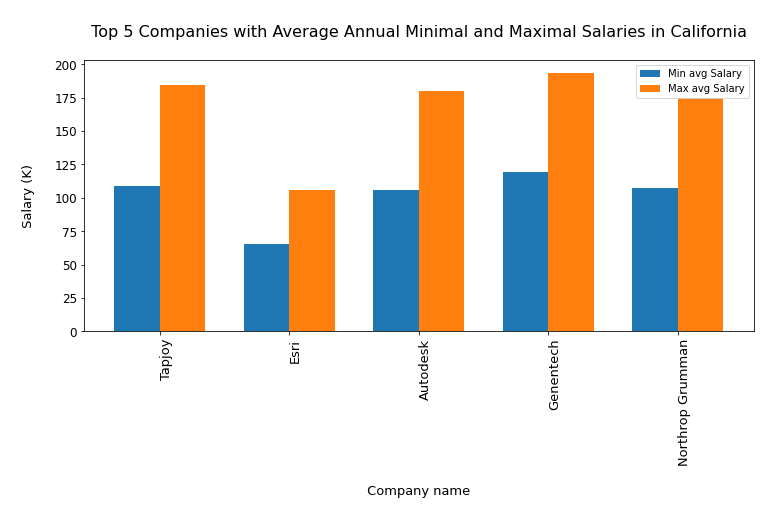

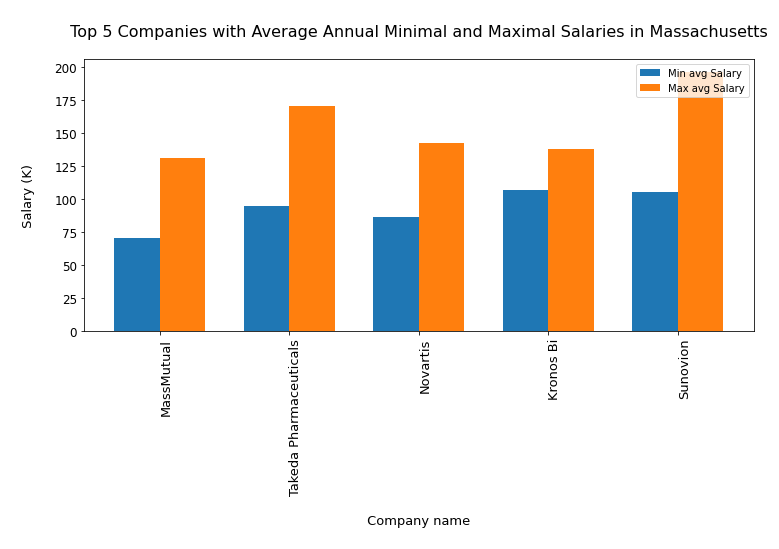

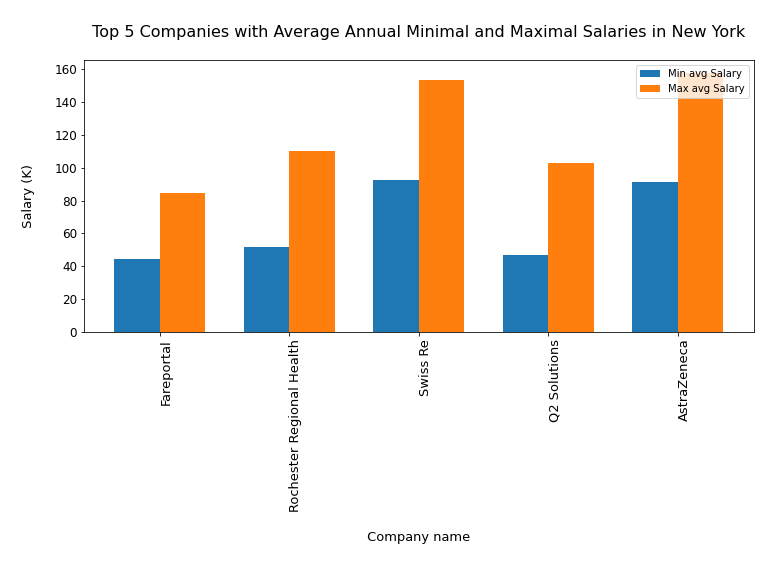

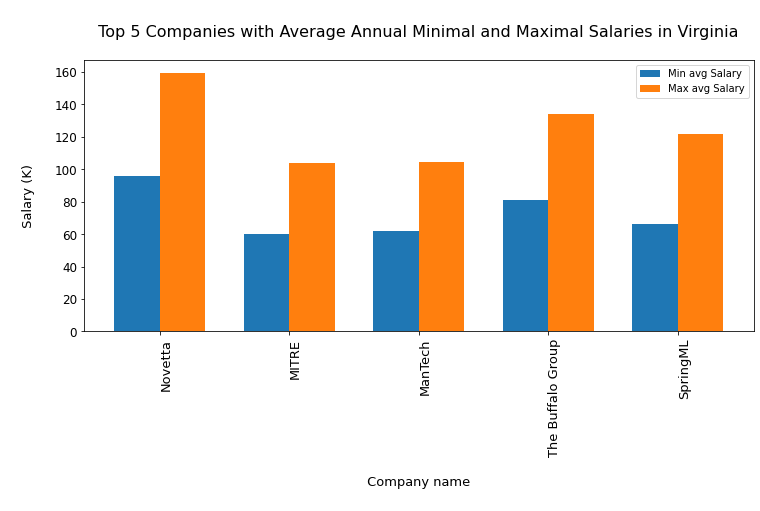

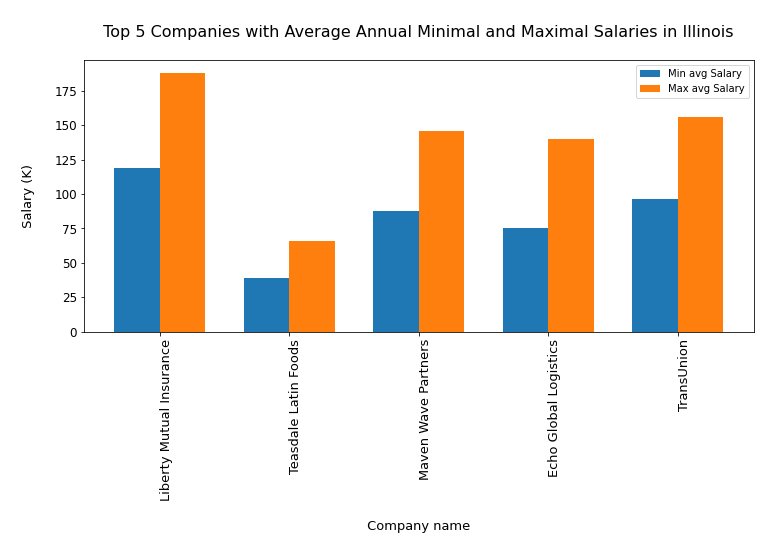

In [32]:
# Drawing the grouped bar plots.

#California

lab=[]
for it in s1[0:5]:
  lab.append(it)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x - width/2, ca["Lower Salary"][0:5], width, label='Min avg Salary')
rects2 = ax.bar(x + width/2, ca["Upper Salary"][0:5], width, label='Max avg Salary')

#assigning the attributes
plt.title('\n Top 5 Companies with Average Annual Minimal and Maximal Salaries in California \n',size=16, color='black')
plt.xticks(fontsize=13)
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.yticks(fontsize=12)
plt.xlabel('\n Company name \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')
ax.set_xticks(x)
ax.set_xticklabels(lab)
ax.legend(loc="upper right")
plt.show()

#Massachusetts

lab=[]
for it in s2[0:5]:
  lab.append(it)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x - width/2, ma["Lower Salary"][0:5], width, label='Min avg Salary')
rects2 = ax.bar(x + width/2, ma["Upper Salary"][0:5], width, label='Max avg Salary')

#assigning the attributes
plt.title('\n Top 5 Companies with Average Annual Minimal and Maximal Salaries in Massachusetts \n',size=16, color='black')
plt.xticks(fontsize=13)
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.yticks(fontsize=12)
plt.xlabel('\n Company name \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')
ax.set_xticks(x)
ax.set_xticklabels(lab)
ax.legend(loc="upper right")
plt.show()

#New York

lab=[]
for it in s3[0:5]:
  lab.append(it)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x - width/2, ny["Lower Salary"][0:5], width, label='Min avg Salary')
rects2 = ax.bar(x + width/2, ny["Upper Salary"][0:5], width, label='Max avg Salary')

#assigning the attributes
plt.title('\n Top 5 Companies with Average Annual Minimal and Maximal Salaries in New York \n',size=16, color='black')
plt.xticks(fontsize=13)
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.yticks(fontsize=12)
plt.xlabel('\n Company name \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')
ax.set_xticks(x)
ax.set_xticklabels(lab)
ax.legend(loc="upper right")
plt.show()

#Virginia

lab=[]
for it in s4[0:5]:
  lab.append(it)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x - width/2, va["Lower Salary"][0:5], width, label='Min avg Salary')
rects2 = ax.bar(x + width/2, va["Upper Salary"][0:5], width, label='Max avg Salary')

#assigning the attributes
plt.title('\n Top 5 Companies with Average Annual Minimal and Maximal Salaries in Virginia \n',size=16, color='black')
plt.xticks(fontsize=13)
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.yticks(fontsize=12)
plt.xlabel('\n Company name \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')
ax.set_xticks(x)
ax.set_xticklabels(lab)
ax.legend(loc="upper right")
plt.show()

#Illinois

lab=[]
for it in s5[0:5]:
  lab.append(it)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x - width/2, il["Lower Salary"][0:5], width, label='Min avg Salary')
rects2 = ax.bar(x + width/2, il["Upper Salary"][0:5], width, label='Max avg Salary')

#assigning the attributes
plt.title('\n Top 5 Companies with Average Annual Minimal and Maximal Salaries in Illinois \n',size=16, color='black')
plt.xticks(fontsize=13)
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.yticks(fontsize=12)
plt.xlabel('\n Company name \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')
ax.set_xticks(x)
ax.set_xticklabels(lab)
ax.legend(loc="upper right")
plt.show()

### California
Greentech has the highest minimal and maximal annual salary among top 5 companies with highest no. of job postings. It is followed by Central California Alliance for Health.

### Massachusetts
Takeda Pharmaceuticals has the highest maximal annual salary. It is followed by Novaritis.
Kronos Bi has the highest minimal annual salary, followed by Takeda Pharmaceuticals.

### New York
AstraZeneca has the highest maximal annual salary. It if followed by Rochester Regional Health.
Swiss Re has the highest minimal annual salary, followed by AstraZeneca.

### Virginia
Novetta has the highest maximal and minimal annual salary.

### Illinois
Liberty Mutual Insurance has the highest maximal and minimal annual salary, followed by TransUnion.

# 6. Job Titles with Most Number of Jobs

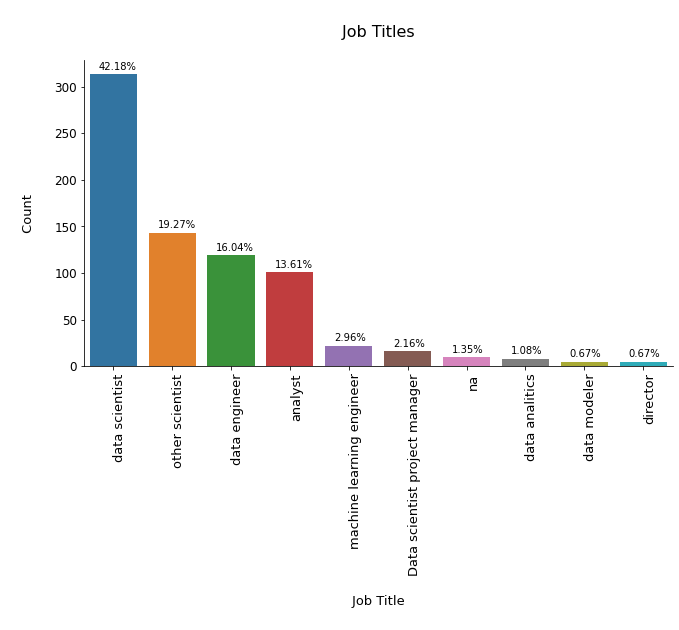

In [33]:
# Looking at the most in demand job titles.
catp = sns.catplot(x="job_title_sim",data=df,order=df.job_title_sim.value_counts().index,kind="count")
catp.fig.set_size_inches(10,5)

#assigning  % values

spots = df.job_title_sim.value_counts().index
ax = catp.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, p.get_height()+5, '{:.2f}%'.format((p.get_height()/742)*100))

#assigning the attributes

plt.title('\n Job Titles \n', size=16, color='black')
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Job Title \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

#na shows those titles other than the titles shown in the plot.

A large number of job postings are for Data Scientist, followed by other scientists (research scientists, consultants etc) and data engineer.

Data scientist, data engineer and data analyst accounts for around 72% of the postings.

ML engineers are in low demand.

In [34]:
# I need to first find the top 5 companies with maximum job postings in those states.

a1=df[df["Job Location"]=="CA"].copy() # It will only copy those records where Job Location is CA.
s1 = a1["job_title_sim"].value_counts().sort_values(ascending=False).index #This will act as a sorter for a1.

b1=df[df["Job Location"]=="MA"].copy() # It will only copy those records where Job Location is MA.
s2 = b1["job_title_sim"].value_counts().sort_values(ascending=False).index #This will act as a sorter for b1.

c1=df[df["Job Location"]=="NY"].copy() # It will only copy those records where Job Location is NY.
s3 = c1["job_title_sim"].value_counts().sort_values(ascending=False).index #This will act as a sorter for c1.

d1=df[df["Job Location"]=="VA"].copy() # It will only copy those records where Job Location is VA.
s4 = d1["job_title_sim"].value_counts().sort_values(ascending=False).index #This will act as a sorter for d1.

e1=df[df["Job Location"]=="IL"].copy() # It will only copy those records where Job Location is IL.
s5 = e1["job_title_sim"].value_counts().sort_values(ascending=False).index #This will act as a sorter for e1.

#Making a DF and sortring it w.r.t. s1
ca = df.groupby("job_title_sim")["Avg Salary(K)"].mean().sort_values(ascending=False)
ca = ca.reset_index()

# Converting company_txt column as Category and setting the sorter.

ca["job_title_sim"] = ca["job_title_sim"].astype("category")
ca["job_title_sim"].cat.set_categories(s1, inplace=True)

#Resetting and droping the index

ca = ca.sort_values(["job_title_sim"]).reset_index()
ca = ca.drop("index",axis=1)


#Making a DF and sortring it w.r.t. s2
ma = df.groupby("job_title_sim")["Avg Salary(K)"].mean().sort_values(ascending=False)
ma = ma.reset_index()

# Converting company_txt column as Category and setting the sorter.

ma["job_title_sim"] = ma["job_title_sim"].astype("category")
ma["job_title_sim"].cat.set_categories(s2, inplace=True)

#Resetting and droping the index

ma = ma.sort_values(["job_title_sim"]).reset_index()
ma = ma.drop("index",axis=1)


#Making a DF and sortring it w.r.t. s3
ny = df.groupby("job_title_sim")["Avg Salary(K)"].mean().sort_values(ascending=False)
ny = ny.reset_index()

# Converting company_txt column as Category and setting the sorter.

ny["job_title_sim"] = ny["job_title_sim"].astype("category")
ny["job_title_sim"].cat.set_categories(s3, inplace=True)

#Resetting and droping the index

ny = ny.sort_values(["job_title_sim"]).reset_index()
ny = ny.drop("index",axis=1)


#Making a DF and sortring it w.r.t. s4
va = df.groupby("job_title_sim")["Avg Salary(K)"].mean().sort_values(ascending=False)
va = va.reset_index()

# Converting company_txt column as Category and setting the sorter.

va["job_title_sim"] = va["job_title_sim"].astype("category")
va["job_title_sim"].cat.set_categories(s4, inplace=True)

#Resetting and droping the index

va = va.sort_values(["job_title_sim"]).reset_index()
va = va.drop("index",axis=1)


#Making a DF and sortring it w.r.t. s5
il = df.groupby("job_title_sim")["Avg Salary(K)"].mean().sort_values(ascending=False)
il = il.reset_index()

# Converting company_txt column as Category and setting the sorter.

il["job_title_sim"] = il["job_title_sim"].astype("category")
il["job_title_sim"].cat.set_categories(s5, inplace=True)

#Resetting and droping the index

il = il.sort_values(["job_title_sim"]).reset_index()
il = il.drop("index",axis=1)

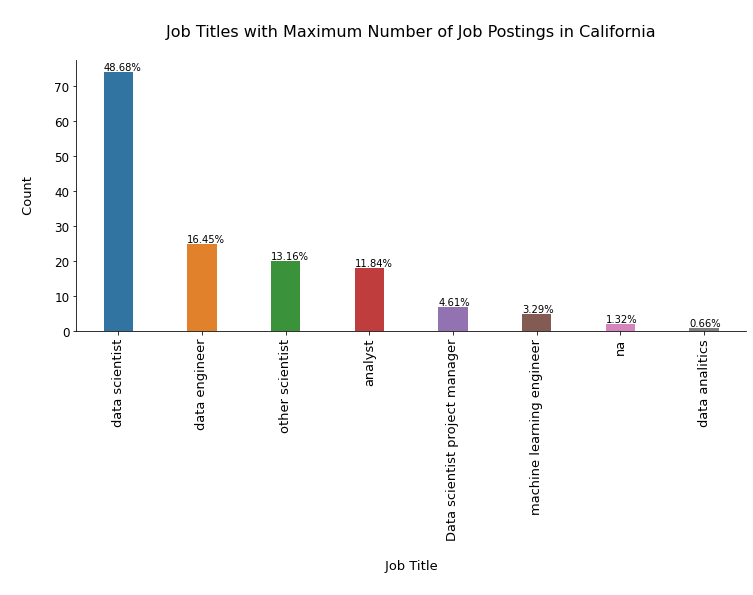

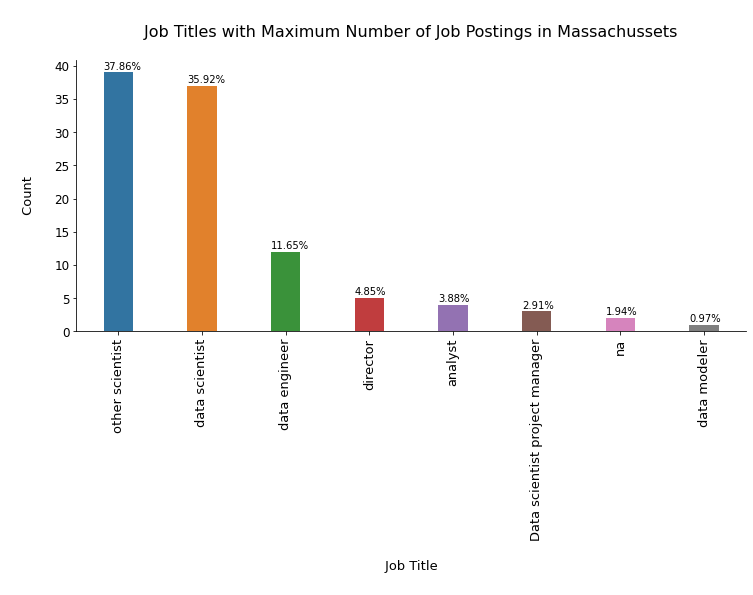

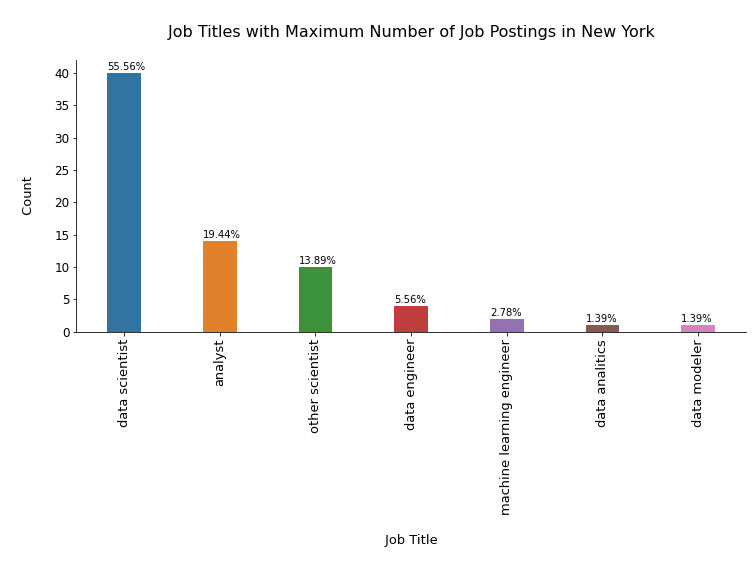

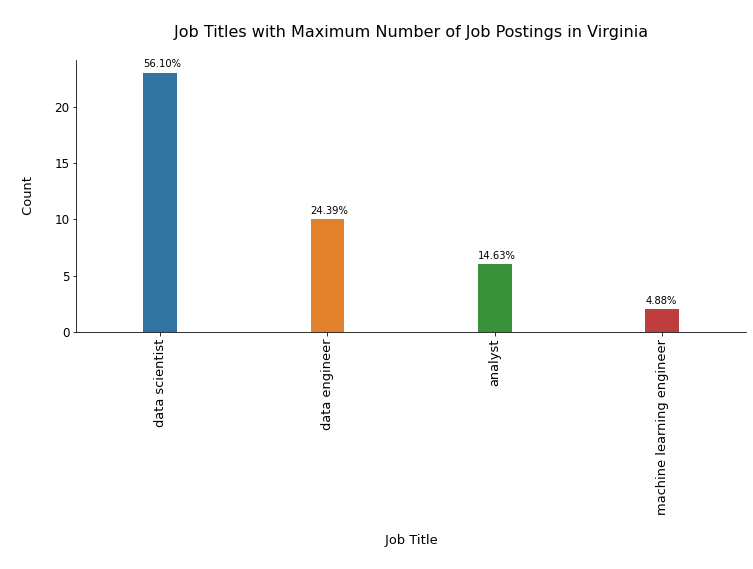

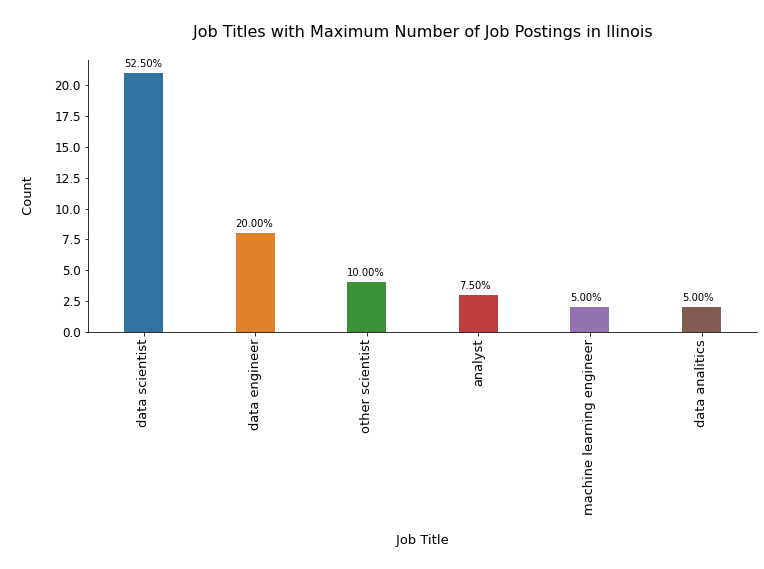

In [35]:
# Viualizing the above information

from IPython.core.pylabtools import figsize
#Lets visualize the top 5 job titles with the most number of job postings.

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= a1["job_title_sim"].value_counts().sort_values(ascending=False).index[0:10] ,y= a1["job_title_sim"].value_counts().sort_values(ascending=False).head(10))

#funtion to set width to 0.35
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)

#Removing top and Right borders

sns.despine(bottom = False, left = False)

# figure size in inches
import matplotlib
from matplotlib import rcParams
#rcParams['figure.figsize'] = 12,5

#Putting % on the bar plot. Credit: Stackoverflow

spots = df["job_title_sim"].value_counts().sort_values(ascending=False).index[0:10]
for p in ax.patches:
    ax.text(p.get_x(), p.get_height()+0.5, '{:.2f}%'.format((p.get_height()/df[df["Job Location"]=="CA"].shape[0])*100))

#Beautifying the plot
plt.title('\n Job Titles with Maximum Number of Job Postings in California \n', size=16, color='black')
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('\n Job Title \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

#Massachussets

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= b1["job_title_sim"].value_counts().sort_values(ascending=False).index[0:10] ,y= b1["job_title_sim"].value_counts().sort_values(ascending=False).head(10))

#funtion to set width to 0.35
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)

#Removing top and Right borders

sns.despine(bottom = False, left = False)

# figure size in inches
import matplotlib
from matplotlib import rcParams
#rcParams['figure.figsize'] = 12,5

#Putting % on the bar plot. Credit: Stackoverflow

spots = df["job_title_sim"].value_counts().sort_values(ascending=False).index[0:10]
for p in ax.patches:
    ax.text(p.get_x(), p.get_height()+0.5, '{:.2f}%'.format((p.get_height()/df[df["Job Location"]=="MA"].shape[0])*100))

#Beautifying the plot
plt.title('\n Job Titles with Maximum Number of Job Postings in Massachussets \n', size=16, color='black')
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('\n Job Title \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

#New York
fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= c1["job_title_sim"].value_counts().sort_values(ascending=False).index[0:10] ,y= c1["job_title_sim"].value_counts().sort_values(ascending=False).head(10))

#funtion to set width to 0.35
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)

#Removing top and Right borders

sns.despine(bottom = False, left = False)

# figure size in inches
import matplotlib
from matplotlib import rcParams
#rcParams['figure.figsize'] = 12,5

#Putting % on the bar plot. Credit: Stackoverflow

spots = df["job_title_sim"].value_counts().sort_values(ascending=False).index[0:10]
for p in ax.patches:
    ax.text(p.get_x(), p.get_height()+0.5, '{:.2f}%'.format((p.get_height()/df[df["Job Location"]=="NY"].shape[0])*100))

#Beautifying the plot
plt.title('\n Job Titles with Maximum Number of Job Postings in New York \n', size=16, color='black')
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('\n Job Title \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

#Virginia
width = 0.35
fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= d1["job_title_sim"].value_counts().sort_values(ascending=False).index[0:10] ,y= d1["job_title_sim"].value_counts().sort_values(ascending=False).head(10))

#funtion to set width to 0.35
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .20)

#Removing top and Right borders

sns.despine(bottom = False, left = False)

# figure size in inches
import matplotlib
from matplotlib import rcParams
#rcParams['figure.figsize'] = 12,5

#Putting % on the bar plot. Credit: Stackoverflow

spots = df["job_title_sim"].value_counts().sort_values(ascending=False).index[0:10]
for p in ax.patches:
    ax.text(p.get_x(), p.get_height()+0.5, '{:.2f}%'.format((p.get_height()/df[df["Job Location"]=="VA"].shape[0])*100))

#Beautifying the plot
plt.title('\n Job Titles with Maximum Number of Job Postings in Virginia \n', size=16, color='black')
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('\n Job Title \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

#Ilinois

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= e1["job_title_sim"].value_counts().sort_values(ascending=False).index[0:10] ,y= e1["job_title_sim"].value_counts().sort_values(ascending=False).head(10))

#funtion to set width to 0.35
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)

#Removing top and Right borders

sns.despine(bottom = False, left = False)

# figure size in inches
import matplotlib
from matplotlib import rcParams
#rcParams['figure.figsize'] = 12,5

#Putting % on the bar plot. Credit: Stackoverflow

spots = df["job_title_sim"].value_counts().sort_values(ascending=False).index[0:10]
for p in ax.patches:
    ax.text(p.get_x(), p.get_height()+0.5, '{:.2f}%'.format((p.get_height()/df[df["Job Location"]=="IL"].shape[0])*100))

#Beautifying the plot
plt.title('\n Job Titles with Maximum Number of Job Postings in Ilinois \n', size=16, color='black')
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('\n Job Title \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

### California
Almost 50% of the job postings are for Data Scientist position, followed by Data Engineer (~17%).
Data Scientist, Data Engineer and Data Analyst accounts for ~77% of the job postings.

### Massachusetts
Almost 40% of the job postings are for Other Scientists (e.g. research scientists) position, followed by Data scientists (~36%).
Other Scientists and Data Scientists positions alone accounts for ~74% of the job postings.

### New York
Almost 56% of the job postings are for Data Scientist position, followed by Data Analyst (~20%).
Unlike California and Massachusetts, Data analyst is high in demand.
Data Scientists and Data Analyst accounts for 75% of the job postings in this state.

### Virginia
Almost 56% of the job postings are for Data Scientist position, followed by Data Engineer (~25%).
Data Scientists and Data Engineer accounts for ~81% of the job postings in this state.

### Illinois
Almost 53% of the job postings are for Data Scientist position, followed by Data Engineer (20%).
Data Scientists, Other Scientists and Data Engineer accounts for ~83% of the job postings in this state.

# 7. Salary of Job Titles with Most Number of Jobs

In [36]:
salary=["Avg Salary(K)"]

In [37]:
#Data scientist
ds = df[df["job_title_sim"]=="data scientist"].groupby("Job Location")[salary].mean().sort_values("Avg Salary(K)",ascending=False)[0:10]

#Data Engineer
de = df[df["job_title_sim"]=="data engineer"].groupby("Job Location")[salary].mean().sort_values("Avg Salary(K)",ascending=False)[0:10]

#Data Analyst
da = df[df["job_title_sim"]=="analyst"].groupby("Job Location")[salary].mean().sort_values("Avg Salary(K)",ascending=False)[0:10]

#Machine Learning Engineer
mle = df[df["job_title_sim"]=="machine learning engineer"].groupby("Job Location")[salary].mean().sort_values("Avg Salary(K)",ascending=False)[0:10]

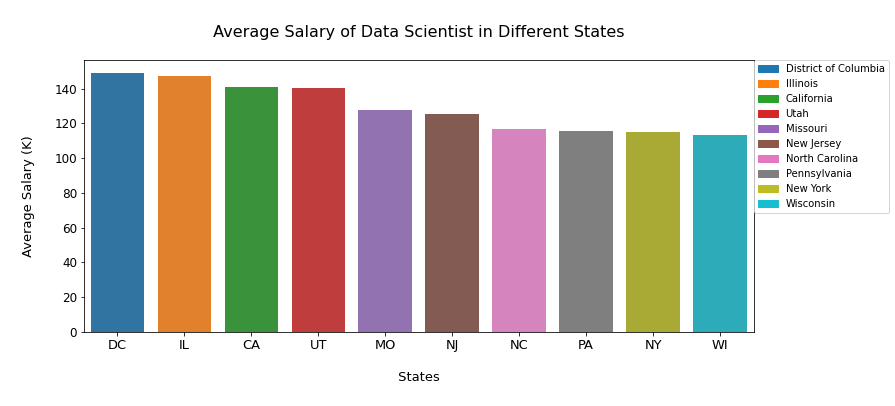

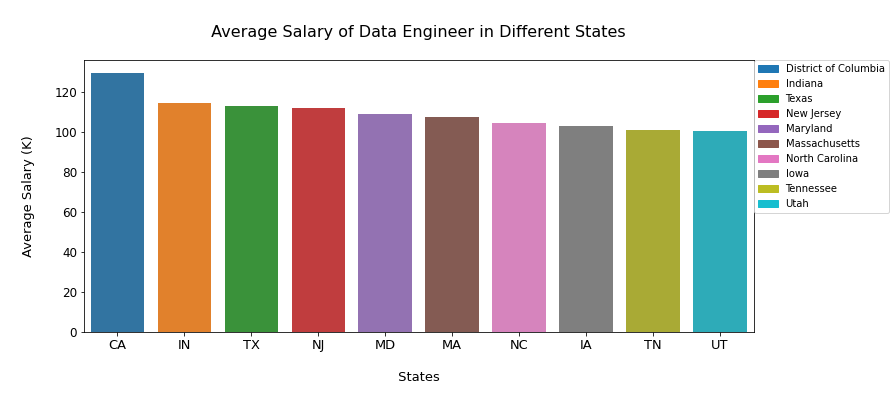

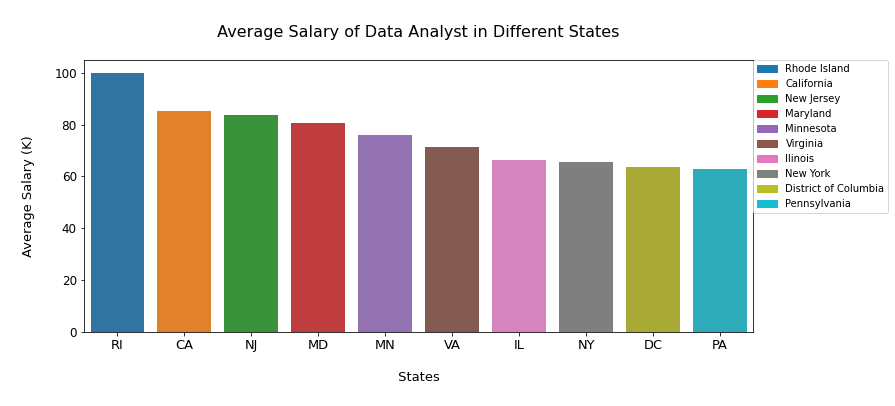

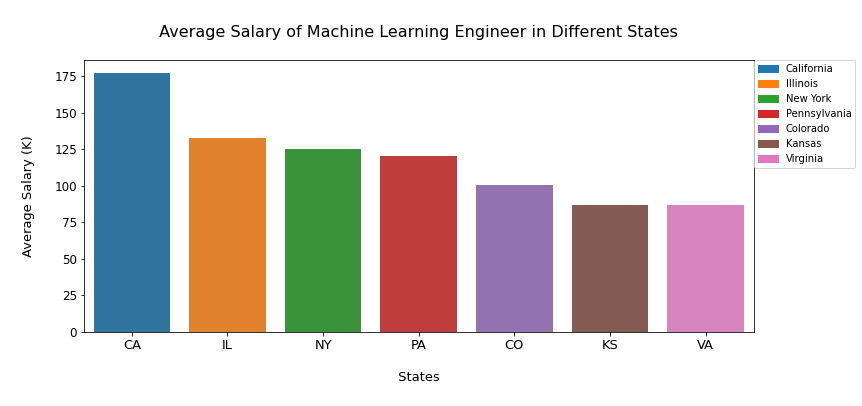

In [38]:
lab=["District of Columbia","Illinois","California","Utah","Missouri","New Jersey","North Carolina","Pennsylvania","New York","Wisconsin"]

#Plot for Data Scientist

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= ds.index, y = ds["Avg Salary(K)"])

# figure size in inches
rcParams['figure.figsize'] = 12,5

#Beautifying the plot
plt.title('\n Average Salary of Data Scientist in Different States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n Average Salary (K) \n', fontsize=13, color='black')
patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=j) for i,j in zip(range(0,10),lab)]
plt.legend(handles=patches,bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

#Plot for Data Engineer
lab=["District of Columbia","Indiana","Texas","New Jersey","Maryland","Massachusetts","North Carolina","Iowa","Tennessee","Utah"]

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= de.index, y = de["Avg Salary(K)"])

# figure size in inches
rcParams['figure.figsize'] = 12,5

#Beautifying the plot
plt.title('\n Average Salary of Data Engineer in Different States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n Average Salary (K) \n', fontsize=13, color='black')
patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=j) for i,j in zip(range(0,10),lab)]
plt.legend(handles=patches,bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()


#Plot for Data Analyst
lab=["Rhode Island","California","New Jersey","Maryland","Minnesota","Virginia","Ilinois","New York","District of Columbia","Pennsylvania"]

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= da.index, y = da["Avg Salary(K)"])

# figure size in inches
rcParams['figure.figsize'] = 12,5

#Beautifying the plot
plt.title('\n Average Salary of Data Analyst in Different States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n Average Salary (K) \n', fontsize=13, color='black')
patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=j) for i,j in zip(range(0,10),lab)]
plt.legend(handles=patches,bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

plt.show()


#Plot for Machine Learning Engineer
lab=["California","Illinois","New York","Pennsylvania","Colorado","Kansas","Virginia"]

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= mle.index, y = mle["Avg Salary(K)"])

# figure size in inches
rcParams['figure.figsize'] = 12,5

#Beautifying the plot
plt.title('\n Average Salary of Machine Learning Engineer in Different States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n Average Salary (K) \n', fontsize=13, color='black')
patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=j) for i,j in zip(range(0,10),lab)]
plt.legend(handles=patches,bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

plt.show()

### Data Scientist

District of Columbia (DC) offers highest average annual salary to Data Scientist, followed by Ilinois (IL) ,California (CA).

### Data Engineer

California offers the highest salary for Data Engineer, followed by Indiana and Texas.

### Data Analyst

Rhode Island offers the highest salary to a Data Analyst, followed by California.

### Machine Learning Engineer

California offers the highest salary for ML Engineer, followed by Illinois and New York.